In [ ]:
!pip cache purge

Files removed: 0


In [ ]:
!wget https://github.com/avdtoto/graph-anisotrophic-diffusion/archive/refs/heads/main.zip

--2024-03-27 12:29:56--  https://github.com/avdtoto/graph-anisotrophic-diffusion/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/avdtoto/graph-anisotrophic-diffusion/zip/refs/heads/main [following]
--2024-03-27 12:29:56--  https://codeload.github.com/avdtoto/graph-anisotrophic-diffusion/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [ <=>                ] 150.62K  --.-KB/s    in 0.02s   

2024-03-27 12:29:57 (9.05 MB/s) - ‘main.zip’ saved [154240]



In [ ]:
!unzip main.zip

Archive:  main.zip
2b5e8dc08a4b011bcb9e2dc89faccdca185a0cf0
   creating: graph-anisotrophic-diffusion-main/
   creating: graph-anisotrophic-diffusion-main/GAD/
  inflating: graph-anisotrophic-diffusion-main/GAD/README.md  
   creating: graph-anisotrophic-diffusion-main/GAD/experiments/
   creating: graph-anisotrophic-diffusion-main/GAD/experiments/QM9/
  inflating: graph-anisotrophic-diffusion-main/GAD/experiments/QM9/README.md  
  inflating: graph-anisotrophic-diffusion-main/GAD/experiments/QM9/main_QM9.py  
  inflating: graph-anisotrophic-diffusion-main/GAD/experiments/QM9/train_eval_QM9.py  
   creating: graph-anisotrophic-diffusion-main/GAD/experiments/ZINC/
  inflating: graph-anisotrophic-diffusion-main/GAD/experiments/ZINC/README.md  
  inflating: graph-anisotrophic-diffusion-main/GAD/experiments/ZINC/main_ZINC.py  
  inflating: graph-anisotrophic-diffusion-main/GAD/experiments/ZINC/preprocessing.py  
  inflating: graph-anisotrophic-diffusion-main/GAD/experiments/ZINC/train_eval_

In [ ]:
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 981.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.17.1+cu121
    Uninstalling torchvision-0.17.1+cu121:
      Successfully uninstalled torchvision-0.17.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.2.1+cu121
    Uninstalling torchaudio-2.2.1+cu121:
      Successfully uninstalled torchaudio-2.2.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fol

In [ ]:
import torch
print(torch.__version__)

1.11.0+cu113


In [ ]:
!pip install torch-scatter==2.0.9 -f https://data.pyg.org/whl/torch-1.11.0+cu113.html

Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 94.9 MB/s eta 0:00:00


In [ ]:
!pip install torch-sparse==0.6.13 -f https://data.pyg.org/whl/torch-1.11.0+cu113.html

Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00


In [ ]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 35.7 MB/s eta 0:00:00


In [ ]:
import sys
sys.path.insert(0, "graph-anisotrophic-diffusion-main/GAD/src")
sys.path.insert(0, "graph-anisotrophic-diffusion-main/GAD/experiments/ZINC")

In [ ]:
from GAD_ZINC.gad import GAD

In [ ]:
import torch
import torch.optim as opt
import torch.nn as nn

from torch_geometric.datasets import ZINC
from torch_geometric.data import DataLoader
import os
import sys

from tqdm import tqdm

import argparse
import matplotlib.pyplot as plt

from preprocessing import preprocessing_dataset, average_node_degree
from train_eval_ZINC import train_epoch, evaluate_network
from GAD_ZINC.gad import GAD

def train_ZINC(model, optimizer, train_loader, val_loader, device, num_epochs, min_lr):

    loss_fn = nn.L1Loss()

    scheduler = opt.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                     factor=0.5,
                                                     patience=15,
                                                   threshold=0.004,
                                                   verbose=True)

    epoch_train_MAEs, epoch_val_MAEs = [], []

    Best_val_mae = 10

    print("Start training")

    for epoch in range(num_epochs):

        if optimizer.param_groups[0]['lr'] < min_lr:
            print("lr equal to min_lr: exist")
            break

        epoch_train_mae, optimizer = train_epoch(model ,train_loader, optimizer, device, loss_fn)
        epoch_val_mae = evaluate_network(model,  val_loader, device)

        epoch_train_MAEs.append(epoch_train_mae)
        epoch_val_MAEs.append(epoch_val_mae)

        scheduler.step(epoch_val_mae)
        if(epoch_val_mae < Best_val_mae):
            Best_val_mae =  epoch_val_mae
            torch.save(model, 'model_new.pth')

        torch.save(model, 'model_running_new.pth')

        print("")
        print("epoch_idx", epoch)
        print("epoch_train_MAE", epoch_train_mae)
        print("epoch_val_MAE", epoch_val_mae)

    print("Finish training")

    return epoch_train_MAEs, epoch_val_MAEs

def main():

    batch_size=16
    k=30

    hid_dim=65
    use_graph_norm=True
    use_batch_norm=True
    dropout=0
    readout='mean'
    aggregators='mean dir_der max min'
    scalers='identity amplification attenuation'
    use_edge_fts=True
    towers=5
    type_net='tower'
    use_residual=True
    use_diffusion=True
    diffusion_method='implicit'
    n_layers=4


    lr=1e-3
    weight_decay=3e-6
    num_epochs=300
    min_lr=1e-5

    print("downloading the dataset (ZINC)")
    dataset_train = ZINC(root='/tmp/a', subset=True)
    dataset_val = ZINC(root='/tmp/a', subset=True, split='val')
    dataset_test = ZINC(root='/tmp/a', subset=True, split='test')

    print("dataset_train contains ", len(dataset_train), "samples")
    print("dataset_val contains ", len(dataset_val), "samples")
    print("dataset_test contains ", len(dataset_test), "samples")

    print("data preprocessing: calculate and store the vector field F, etc.")

    D, avg_d = average_node_degree(dataset_train)
    dataset_train = preprocessing_dataset(dataset_train, k)
    dataset_val = preprocessing_dataset(dataset_val, k)
    dataset_test = preprocessing_dataset(dataset_test, k)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    train_loader = DataLoader(dataset = dataset_train, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset = dataset_val, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(dataset =  dataset_test, batch_size=batch_size, shuffle=False)

    print("create GAD model")

    model = GAD(num_atom_type = 28, num_bond_type = 4, hid_dim = hid_dim, graph_norm = use_graph_norm,
               batch_norm = use_batch_norm, dropout = dropout, readout = readout, aggregators = aggregators,
               scalers = scalers, edge_fts = use_edge_fts, avg_d = avg_d, D = D, device = device, towers= towers,
               type_net = type_net, residual = use_residual, use_diffusion = use_diffusion,
               diffusion_method = diffusion_method, k = k, n_layers = n_layers)


    model = model.to(device)

    optimizer = opt.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    epoch_train_MAEs, epoch_val_MAEs = train_ZINC(model, optimizer, train_loader, val_loader, device, num_epochs = num_epochs, min_lr = min_lr)

    print("Uploading the best model")

    model = torch.load('/content/model_new.pth')


    test_mae = evaluate_network(model, test_loader, device)
    val_mae = evaluate_network(model, val_loader, device)
    train_mae = evaluate_network(model, train_loader, device)

    print("")
    print("Best Train MAE: {:.4f}".format(train_mae))
    print("Best Val MAE: {:.4f}".format(val_mae))
    print("Best Test MAE: {:.4f}".format(test_mae))

    return epoch_train_MAEs, epoch_val_MAEs, model



In [ ]:
epoch_train_MAEs, epoch_val_MAEs, model = main()

downloading the dataset (ZINC)
dataset_train contains  10000 samples
dataset_val contains  1000 samples
dataset_test contains  1000 samples
data preprocessing: calculate and store the vector field F, etc.


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


create GAD model
Start training


1it [00:00,  3.00it/s]
1it [00:00,  6.59it/s]



epoch_idx 0
epoch_train_MAE 1.5170937776565552
epoch_val_MAE 1.414663314819336


1it [00:00,  3.70it/s]
1it [00:00,  6.73it/s]



epoch_idx 1
epoch_train_MAE 1.5001851320266724
epoch_val_MAE 1.3797436952590942


1it [00:00,  4.38it/s]
1it [00:00,  6.97it/s]



epoch_idx 2
epoch_train_MAE 1.4864130020141602
epoch_val_MAE 1.3555901050567627


1it [00:00,  4.13it/s]
1it [00:00,  6.46it/s]



epoch_idx 3
epoch_train_MAE 1.4583920240402222
epoch_val_MAE 1.34304940700531


1it [00:00,  4.34it/s]
1it [00:00,  6.27it/s]



epoch_idx 4
epoch_train_MAE 1.4151643514633179
epoch_val_MAE 1.3331925868988037


1it [00:00,  4.03it/s]
1it [00:00,  6.71it/s]



epoch_idx 5
epoch_train_MAE 1.3560811281204224
epoch_val_MAE 1.3194611072540283


1it [00:00,  3.97it/s]
1it [00:00,  6.98it/s]



epoch_idx 6
epoch_train_MAE 1.270806074142456
epoch_val_MAE 1.2831865549087524


1it [00:00,  4.18it/s]
1it [00:00,  6.40it/s]



epoch_idx 7
epoch_train_MAE 1.1500033140182495
epoch_val_MAE 1.2328225374221802


1it [00:00,  4.33it/s]
1it [00:00,  6.45it/s]



epoch_idx 8
epoch_train_MAE 1.2571126222610474
epoch_val_MAE 1.280877709388733


1it [00:00,  3.89it/s]
1it [00:00,  6.28it/s]



epoch_idx 9
epoch_train_MAE 1.254995346069336
epoch_val_MAE 1.3752684593200684


1it [00:00,  2.91it/s]
1it [00:00,  4.98it/s]



epoch_idx 10
epoch_train_MAE 1.175847053527832
epoch_val_MAE 1.4734728336334229


1it [00:00,  1.81it/s]
1it [00:00,  4.51it/s]



epoch_idx 11
epoch_train_MAE 1.1155626773834229
epoch_val_MAE 1.5018105506896973


1it [00:00,  1.73it/s]
1it [00:00,  5.19it/s]



epoch_idx 12
epoch_train_MAE 1.1251338720321655
epoch_val_MAE 1.4990872144699097


1it [00:00,  1.82it/s]
1it [00:00,  4.46it/s]



epoch_idx 13
epoch_train_MAE 1.0846736431121826
epoch_val_MAE 1.4816036224365234


1it [00:00,  4.27it/s]
1it [00:00,  6.70it/s]



epoch_idx 14
epoch_train_MAE 1.0151556730270386
epoch_val_MAE 1.5065290927886963


1it [00:00,  4.21it/s]
1it [00:00,  6.66it/s]



epoch_idx 15
epoch_train_MAE 0.9752106666564941
epoch_val_MAE 1.5764611959457397


1it [00:00,  4.39it/s]
1it [00:00,  6.72it/s]



epoch_idx 16
epoch_train_MAE 0.9428889751434326
epoch_val_MAE 1.6331729888916016


1it [00:00,  4.14it/s]
1it [00:00,  6.09it/s]



epoch_idx 17
epoch_train_MAE 0.8775356411933899
epoch_val_MAE 1.7147676944732666


1it [00:00,  4.31it/s]
1it [00:00,  6.53it/s]



epoch_idx 18
epoch_train_MAE 0.7772358655929565
epoch_val_MAE 1.9091352224349976


1it [00:00,  4.27it/s]
1it [00:00,  6.56it/s]



epoch_idx 19
epoch_train_MAE 0.6670557856559753
epoch_val_MAE 2.245893716812134


1it [00:00,  4.18it/s]
1it [00:00,  6.74it/s]



epoch_idx 20
epoch_train_MAE 0.5436643362045288
epoch_val_MAE 2.781602382659912


1it [00:00,  4.35it/s]
1it [00:00,  6.66it/s]



epoch_idx 21
epoch_train_MAE 0.36501362919807434
epoch_val_MAE 3.661515235900879


1it [00:00,  4.18it/s]
1it [00:00,  6.69it/s]



epoch_idx 22
epoch_train_MAE 0.11734050512313843
epoch_val_MAE 5.150294780731201


1it [00:00,  4.27it/s]
1it [00:00,  6.16it/s]


Epoch 00024: reducing learning rate of group 0 to 5.0000e-04.

epoch_idx 23
epoch_train_MAE 0.18680396676063538
epoch_val_MAE 5.592983722686768


1it [00:00,  4.12it/s]
1it [00:00,  6.68it/s]



epoch_idx 24
epoch_train_MAE 0.351664274930954
epoch_val_MAE 5.1186628341674805


1it [00:00,  4.26it/s]
1it [00:00,  6.52it/s]



epoch_idx 25
epoch_train_MAE 0.34893953800201416
epoch_val_MAE 4.745793342590332


1it [00:00,  4.40it/s]
1it [00:00,  6.09it/s]



epoch_idx 26
epoch_train_MAE 0.2745366096496582
epoch_val_MAE 4.455780029296875


1it [00:00,  4.26it/s]
1it [00:00,  6.46it/s]



epoch_idx 27
epoch_train_MAE 0.2172258496284485
epoch_val_MAE 4.140289306640625


1it [00:00,  4.40it/s]
1it [00:00,  6.62it/s]



epoch_idx 28
epoch_train_MAE 0.12453553080558777
epoch_val_MAE 3.776975631713867


1it [00:00,  4.37it/s]
1it [00:00,  6.53it/s]



epoch_idx 29
epoch_train_MAE 0.14697611331939697
epoch_val_MAE 3.282731533050537


1it [00:00,  4.36it/s]
1it [00:00,  6.65it/s]



epoch_idx 30
epoch_train_MAE 0.18081232905387878
epoch_val_MAE 2.8821027278900146


1it [00:00,  4.09it/s]
1it [00:00,  6.27it/s]



epoch_idx 31
epoch_train_MAE 0.16401982307434082
epoch_val_MAE 2.703460454940796


1it [00:00,  4.31it/s]
1it [00:00,  6.33it/s]



epoch_idx 32
epoch_train_MAE 0.1539691984653473
epoch_val_MAE 2.5955467224121094


1it [00:00,  4.13it/s]
1it [00:00,  5.91it/s]



epoch_idx 33
epoch_train_MAE 0.15060442686080933
epoch_val_MAE 2.519469976425171


1it [00:00,  4.20it/s]
1it [00:00,  6.59it/s]



epoch_idx 34
epoch_train_MAE 0.11631420254707336
epoch_val_MAE 2.4632558822631836


1it [00:00,  4.22it/s]
1it [00:00,  4.42it/s]



epoch_idx 35
epoch_train_MAE 0.05276581645011902
epoch_val_MAE 2.409949779510498


1it [00:00,  3.23it/s]
1it [00:00,  5.07it/s]



epoch_idx 36
epoch_train_MAE 0.08438092470169067
epoch_val_MAE 2.38173770904541


1it [00:00,  2.61it/s]
1it [00:00,  4.86it/s]



epoch_idx 37
epoch_train_MAE 0.10099512338638306
epoch_val_MAE 2.209469795227051


1it [00:00,  3.45it/s]
1it [00:00,  5.25it/s]



epoch_idx 38
epoch_train_MAE 0.12141817808151245
epoch_val_MAE 1.947394609451294


1it [00:00,  2.87it/s]
1it [00:00,  4.58it/s]


Epoch 00040: reducing learning rate of group 0 to 2.5000e-04.

epoch_idx 39
epoch_train_MAE 0.10409924387931824
epoch_val_MAE 1.6918697357177734


1it [00:00,  3.70it/s]
1it [00:00,  6.68it/s]



epoch_idx 40
epoch_train_MAE 0.05436044931411743
epoch_val_MAE 1.5977952480316162


1it [00:00,  4.26it/s]
1it [00:00,  6.66it/s]



epoch_idx 41
epoch_train_MAE 0.028917133808135986
epoch_val_MAE 1.5698721408843994


1it [00:00,  4.32it/s]
1it [00:00,  6.12it/s]



epoch_idx 42
epoch_train_MAE 0.03302523493766785
epoch_val_MAE 1.5872822999954224


1it [00:00,  4.35it/s]
1it [00:00,  6.78it/s]



epoch_idx 43
epoch_train_MAE 0.023664414882659912
epoch_val_MAE 1.624798059463501


1it [00:00,  4.29it/s]
1it [00:00,  6.49it/s]



epoch_idx 44
epoch_train_MAE 0.02182069420814514
epoch_val_MAE 1.6689560413360596


1it [00:00,  4.24it/s]
1it [00:00,  6.24it/s]



epoch_idx 45
epoch_train_MAE 0.034491926431655884
epoch_val_MAE 1.6607826948165894


1it [00:00,  4.34it/s]
1it [00:00,  6.45it/s]



epoch_idx 46
epoch_train_MAE 0.03895455598831177
epoch_val_MAE 1.6128679513931274


1it [00:00,  3.91it/s]
1it [00:00,  6.55it/s]



epoch_idx 47
epoch_train_MAE 0.024487972259521484
epoch_val_MAE 1.5402696132659912


1it [00:00,  4.31it/s]
1it [00:00,  6.60it/s]



epoch_idx 48
epoch_train_MAE 0.00635412335395813
epoch_val_MAE 1.5178951025009155


1it [00:00,  4.14it/s]
1it [00:00,  6.40it/s]



epoch_idx 49
epoch_train_MAE 0.015833944082260132
epoch_val_MAE 1.5510826110839844


1it [00:00,  4.27it/s]
1it [00:00,  6.75it/s]



epoch_idx 50
epoch_train_MAE 0.008178293704986572
epoch_val_MAE 1.526059627532959


1it [00:00,  4.37it/s]
1it [00:00,  6.22it/s]



epoch_idx 51
epoch_train_MAE 0.0051319897174835205
epoch_val_MAE 1.5531692504882812


1it [00:00,  4.40it/s]
1it [00:00,  6.52it/s]



epoch_idx 52
epoch_train_MAE 0.013303369283676147
epoch_val_MAE 1.5404250621795654


1it [00:00,  4.33it/s]
1it [00:00,  6.78it/s]



epoch_idx 53
epoch_train_MAE 0.012924343347549438
epoch_val_MAE 1.4974853992462158


1it [00:00,  4.35it/s]
1it [00:00,  6.87it/s]



epoch_idx 54
epoch_train_MAE 0.018885314464569092
epoch_val_MAE 1.4801055192947388


1it [00:00,  4.29it/s]
1it [00:00,  6.70it/s]


Epoch 00056: reducing learning rate of group 0 to 1.2500e-04.

epoch_idx 55
epoch_train_MAE 0.015158146619796753
epoch_val_MAE 1.5172430276870728


1it [00:00,  3.99it/s]
1it [00:00,  6.34it/s]



epoch_idx 56
epoch_train_MAE 0.016150444746017456
epoch_val_MAE 1.557227373123169


1it [00:00,  4.27it/s]
1it [00:00,  6.73it/s]



epoch_idx 57
epoch_train_MAE 0.012820035219192505
epoch_val_MAE 1.5612815618515015


1it [00:00,  4.00it/s]
1it [00:00,  6.39it/s]



epoch_idx 58
epoch_train_MAE 0.015408188104629517
epoch_val_MAE 1.5385825634002686


1it [00:00,  4.32it/s]
1it [00:00,  6.54it/s]



epoch_idx 59
epoch_train_MAE 0.010748952627182007
epoch_val_MAE 1.4968312978744507


1it [00:00,  4.38it/s]
1it [00:00,  5.92it/s]



epoch_idx 60
epoch_train_MAE 0.009117335081100464
epoch_val_MAE 1.486310601234436


1it [00:00,  3.95it/s]
1it [00:00,  6.02it/s]



epoch_idx 61
epoch_train_MAE 0.007608979940414429
epoch_val_MAE 1.5006613731384277


1it [00:00,  3.07it/s]
1it [00:00,  4.74it/s]



epoch_idx 62
epoch_train_MAE 0.007219433784484863
epoch_val_MAE 1.5372707843780518


1it [00:00,  3.39it/s]
1it [00:00,  4.17it/s]



epoch_idx 63
epoch_train_MAE 0.01329571008682251
epoch_val_MAE 1.5432080030441284


1it [00:00,  3.18it/s]
1it [00:00,  5.38it/s]



epoch_idx 64
epoch_train_MAE 0.013886243104934692
epoch_val_MAE 1.5273786783218384


1it [00:00,  3.37it/s]
1it [00:00,  4.48it/s]



epoch_idx 65
epoch_train_MAE 0.006558477878570557
epoch_val_MAE 1.4976140260696411


1it [00:00,  2.77it/s]
1it [00:00,  6.82it/s]



epoch_idx 66
epoch_train_MAE 0.007725417613983154
epoch_val_MAE 1.4957692623138428


1it [00:00,  4.40it/s]
1it [00:00,  6.74it/s]



epoch_idx 67
epoch_train_MAE 0.01280626654624939
epoch_val_MAE 1.5125610828399658


1it [00:00,  4.17it/s]
1it [00:00,  6.47it/s]



epoch_idx 68
epoch_train_MAE 0.009743154048919678
epoch_val_MAE 1.5435091257095337


1it [00:00,  4.28it/s]
1it [00:00,  6.22it/s]



epoch_idx 69
epoch_train_MAE 0.01275557279586792
epoch_val_MAE 1.5413751602172852


1it [00:00,  4.14it/s]
1it [00:00,  6.87it/s]



epoch_idx 70
epoch_train_MAE 0.011142939329147339
epoch_val_MAE 1.5144338607788086


1it [00:00,  4.41it/s]
1it [00:00,  6.70it/s]


Epoch 00072: reducing learning rate of group 0 to 6.2500e-05.

epoch_idx 71
epoch_train_MAE 0.010455071926116943
epoch_val_MAE 1.4828557968139648


1it [00:00,  4.03it/s]
1it [00:00,  6.56it/s]



epoch_idx 72
epoch_train_MAE 0.007328689098358154
epoch_val_MAE 1.4811426401138306


1it [00:00,  4.08it/s]
1it [00:00,  6.56it/s]



epoch_idx 73
epoch_train_MAE 0.00845298171043396
epoch_val_MAE 1.488752841949463


1it [00:00,  4.13it/s]
1it [00:00,  6.19it/s]



epoch_idx 74
epoch_train_MAE 0.0060579776763916016
epoch_val_MAE 1.5099037885665894


1it [00:00,  4.23it/s]
1it [00:00,  6.56it/s]



epoch_idx 75
epoch_train_MAE 0.007337898015975952
epoch_val_MAE 1.5164921283721924


1it [00:00,  4.09it/s]
1it [00:00,  6.19it/s]



epoch_idx 76
epoch_train_MAE 0.005150794982910156
epoch_val_MAE 1.5125914812088013


1it [00:00,  4.32it/s]
1it [00:00,  6.34it/s]



epoch_idx 77
epoch_train_MAE 0.005232781171798706
epoch_val_MAE 1.4986603260040283


1it [00:00,  4.21it/s]
1it [00:00,  6.55it/s]



epoch_idx 78
epoch_train_MAE 0.006959289312362671
epoch_val_MAE 1.4977965354919434


1it [00:00,  4.27it/s]
1it [00:00,  6.37it/s]



epoch_idx 79
epoch_train_MAE 0.008989006280899048
epoch_val_MAE 1.505944013595581


1it [00:00,  4.11it/s]
1it [00:00,  6.60it/s]



epoch_idx 80
epoch_train_MAE 0.007104814052581787
epoch_val_MAE 1.5208969116210938


1it [00:00,  4.28it/s]
1it [00:00,  6.77it/s]



epoch_idx 81
epoch_train_MAE 0.007160305976867676
epoch_val_MAE 1.5196847915649414


1it [00:00,  4.28it/s]
1it [00:00,  5.90it/s]



epoch_idx 82
epoch_train_MAE 0.005932241678237915
epoch_val_MAE 1.506372332572937


1it [00:00,  4.24it/s]
1it [00:00,  6.43it/s]



epoch_idx 83
epoch_train_MAE 0.0038036704063415527
epoch_val_MAE 1.487538456916809


1it [00:00,  4.15it/s]
1it [00:00,  6.47it/s]



epoch_idx 84
epoch_train_MAE 0.0038268864154815674
epoch_val_MAE 1.4854284524917603


1it [00:00,  4.14it/s]
1it [00:00,  6.71it/s]



epoch_idx 85
epoch_train_MAE 0.005226165056228638
epoch_val_MAE 1.4954842329025269


1it [00:00,  4.30it/s]
1it [00:00,  6.35it/s]



epoch_idx 86
epoch_train_MAE 0.0031419098377227783
epoch_val_MAE 1.5149643421173096


1it [00:00,  4.26it/s]
1it [00:00,  5.51it/s]


Epoch 00088: reducing learning rate of group 0 to 3.1250e-05.

epoch_idx 87
epoch_train_MAE 0.004079163074493408
epoch_val_MAE 1.5204349756240845


1it [00:00,  3.07it/s]
1it [00:00,  4.86it/s]



epoch_idx 88
epoch_train_MAE 0.005508452653884888
epoch_val_MAE 1.5153204202651978


1it [00:00,  3.11it/s]
1it [00:00,  4.51it/s]



epoch_idx 89
epoch_train_MAE 0.005385905504226685
epoch_val_MAE 1.505775809288025


1it [00:00,  3.25it/s]
1it [00:00,  4.90it/s]



epoch_idx 90
epoch_train_MAE 0.0036154985427856445
epoch_val_MAE 1.4932477474212646


1it [00:00,  3.01it/s]
1it [00:00,  4.26it/s]



epoch_idx 91
epoch_train_MAE 0.003757864236831665
epoch_val_MAE 1.488466739654541


1it [00:00,  2.99it/s]
1it [00:00,  6.61it/s]



epoch_idx 92
epoch_train_MAE 0.0040739476680755615
epoch_val_MAE 1.4891703128814697


1it [00:00,  4.21it/s]
1it [00:00,  6.34it/s]



epoch_idx 93
epoch_train_MAE 0.0033759474754333496
epoch_val_MAE 1.4953421354293823


1it [00:00,  4.14it/s]
1it [00:00,  6.23it/s]



epoch_idx 94
epoch_train_MAE 0.0030329227447509766
epoch_val_MAE 1.5056915283203125


1it [00:00,  4.28it/s]
1it [00:00,  6.63it/s]



epoch_idx 95
epoch_train_MAE 0.0019277632236480713
epoch_val_MAE 1.5088661909103394


1it [00:00,  4.17it/s]
1it [00:00,  6.24it/s]



epoch_idx 96
epoch_train_MAE 0.0022667646408081055
epoch_val_MAE 1.5067832469940186


1it [00:00,  4.13it/s]
1it [00:00,  5.60it/s]



epoch_idx 97
epoch_train_MAE 0.0007348358631134033
epoch_val_MAE 1.5011667013168335


1it [00:00,  4.17it/s]
1it [00:00,  6.62it/s]



epoch_idx 98
epoch_train_MAE 0.0024709105491638184
epoch_val_MAE 1.5016791820526123


1it [00:00,  4.49it/s]
1it [00:00,  6.50it/s]



epoch_idx 99
epoch_train_MAE 0.003523498773574829
epoch_val_MAE 1.506443977355957


1it [00:00,  4.48it/s]
1it [00:00,  6.60it/s]



epoch_idx 100
epoch_train_MAE 0.002647101879119873
epoch_val_MAE 1.5144530534744263


1it [00:00,  4.12it/s]
1it [00:00,  6.67it/s]



epoch_idx 101
epoch_train_MAE 0.0031626224517822266
epoch_val_MAE 1.5142295360565186


1it [00:00,  4.21it/s]
1it [00:00,  6.44it/s]



epoch_idx 102
epoch_train_MAE 0.002852708101272583
epoch_val_MAE 1.5079020261764526


1it [00:00,  4.11it/s]
1it [00:00,  6.68it/s]


Epoch 00104: reducing learning rate of group 0 to 1.5625e-05.

epoch_idx 103
epoch_train_MAE 0.002653181552886963
epoch_val_MAE 1.4987479448318481


1it [00:00,  4.08it/s]
1it [00:00,  6.69it/s]



epoch_idx 104
epoch_train_MAE 0.0016932785511016846
epoch_val_MAE 1.4937264919281006


1it [00:00,  4.23it/s]
1it [00:00,  6.13it/s]



epoch_idx 105
epoch_train_MAE 0.0027806460857391357
epoch_val_MAE 1.4930304288864136


1it [00:00,  4.10it/s]
1it [00:00,  6.35it/s]



epoch_idx 106
epoch_train_MAE 0.003174394369125366
epoch_val_MAE 1.4954861402511597


1it [00:00,  4.28it/s]
1it [00:00,  6.27it/s]



epoch_idx 107
epoch_train_MAE 0.0027061402797698975
epoch_val_MAE 1.500255823135376


1it [00:00,  4.18it/s]
1it [00:00,  6.53it/s]



epoch_idx 108
epoch_train_MAE 0.0014639794826507568
epoch_val_MAE 1.5067840814590454


1it [00:00,  4.35it/s]
1it [00:00,  6.68it/s]



epoch_idx 109
epoch_train_MAE 0.0010875463485717773
epoch_val_MAE 1.5139856338500977


1it [00:00,  4.01it/s]
1it [00:00,  6.17it/s]



epoch_idx 110
epoch_train_MAE 0.002515941858291626
epoch_val_MAE 1.5163031816482544


1it [00:00,  4.25it/s]
1it [00:00,  6.65it/s]



epoch_idx 111
epoch_train_MAE 0.003533989191055298
epoch_val_MAE 1.5149939060211182


1it [00:00,  4.32it/s]
1it [00:00,  6.41it/s]



epoch_idx 112
epoch_train_MAE 0.0036302506923675537
epoch_val_MAE 1.5110098123550415


1it [00:00,  4.28it/s]
1it [00:00,  6.15it/s]



epoch_idx 113
epoch_train_MAE 0.0028978586196899414
epoch_val_MAE 1.505070447921753


1it [00:00,  3.06it/s]
1it [00:00,  4.65it/s]



epoch_idx 114
epoch_train_MAE 0.0014215707778930664
epoch_val_MAE 1.4978234767913818


1it [00:00,  3.37it/s]
1it [00:00,  4.45it/s]



epoch_idx 115
epoch_train_MAE 0.0007224380970001221
epoch_val_MAE 1.495402455329895


1it [00:00,  3.30it/s]
1it [00:00,  5.18it/s]



epoch_idx 116
epoch_train_MAE 0.0018341243267059326
epoch_val_MAE 1.496500849723816


1it [00:00,  3.13it/s]
1it [00:00,  3.81it/s]



epoch_idx 117
epoch_train_MAE 0.002019047737121582
epoch_val_MAE 1.50020432472229


1it [00:00,  2.72it/s]
1it [00:00,  6.35it/s]



epoch_idx 118
epoch_train_MAE 0.0013713538646697998
epoch_val_MAE 1.5058956146240234


1it [00:00,  4.09it/s]
1it [00:00,  6.27it/s]


Epoch 00120: reducing learning rate of group 0 to 7.8125e-06.

epoch_idx 119
epoch_train_MAE 0.0006560683250427246
epoch_val_MAE 1.5079131126403809
lr equal to min_lr: exist
Finish training
Uploading the best model


1it [00:00,  6.53it/s]
1it [00:00,  5.85it/s]
1it [00:00,  6.81it/s]


Best Train MAE: 1.4814
Best Val MAE: 1.2328
Best Test MAE: 1.0873


<h1> Current model with 3 eigenvectors </h1>

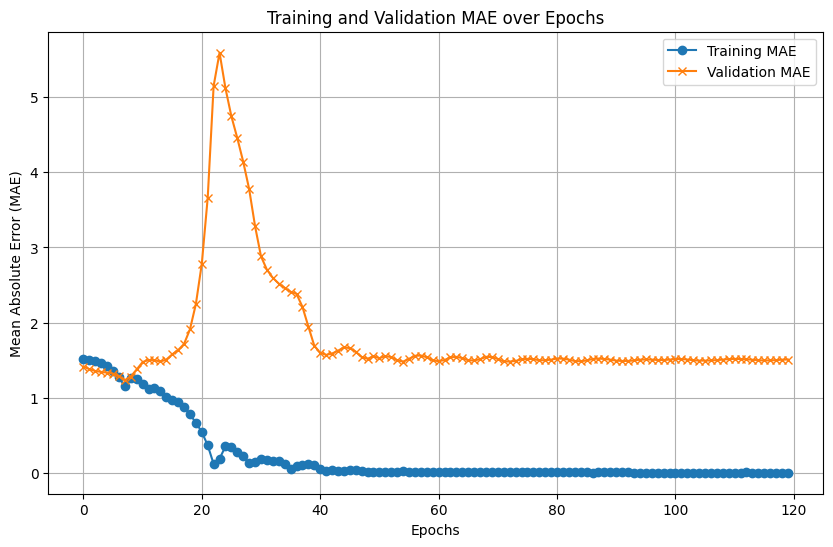

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epoch_train_MAEs, label='Training MAE', marker='o')
plt.plot(epoch_val_MAEs, label='Validation MAE', marker='x')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

<h1> Main model with 1 eigenvector </h1>

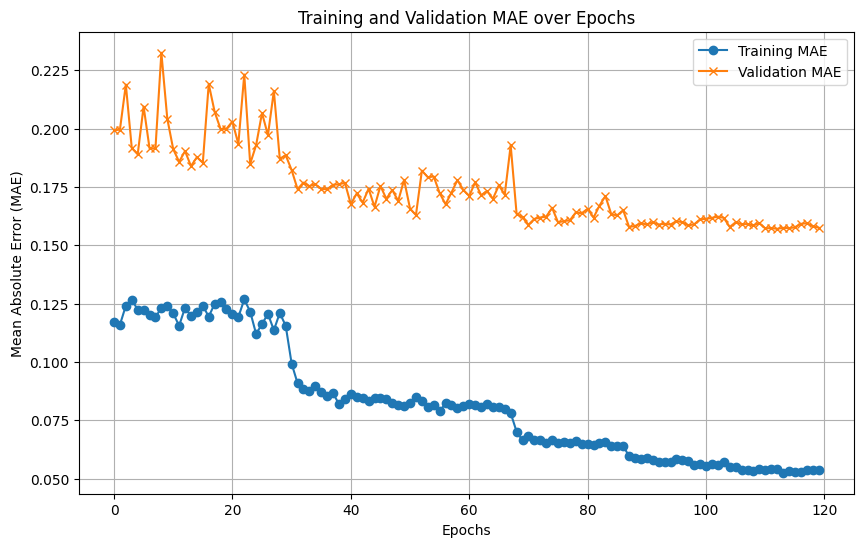

In [3]:
from IPython.display import Image
Image('/content/old_model.png')